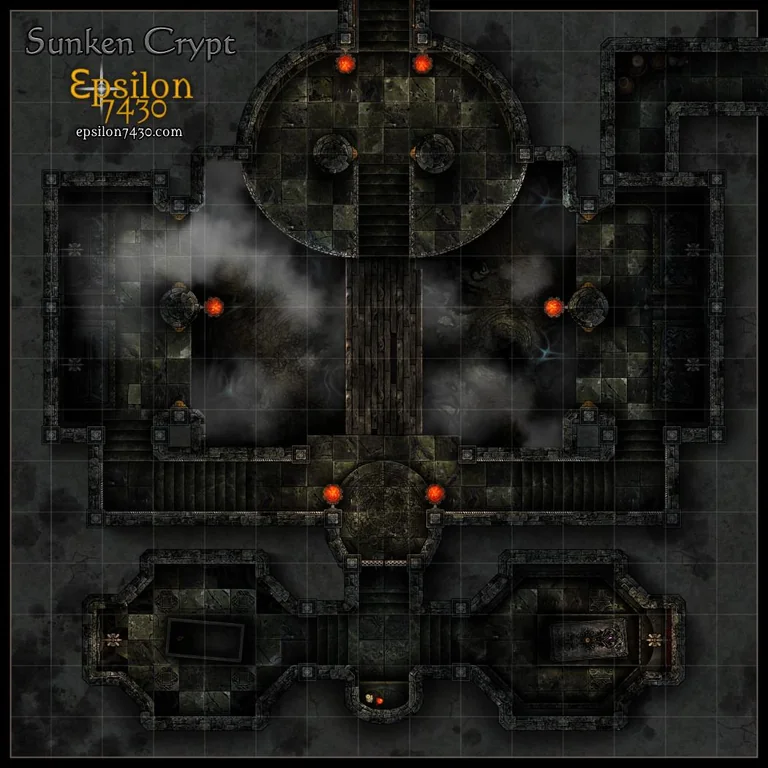

In [36]:
import cv2
from PIL import Image
import numpy as np

def show_rgb_image(image, conversion=cv2.COLOR_BGR2RGB):
    rgb_image = cv2.cvtColor(image, conversion)
    display(Image.fromarray(rgb_image))


# original_img = cv2.imread("./battlemaps/fnat4dt3l2qc1.jpeg")
original_img = cv2.imread("./battlemaps/dnt05llh36qc1.jpg")
show_rgb_image(original_img)


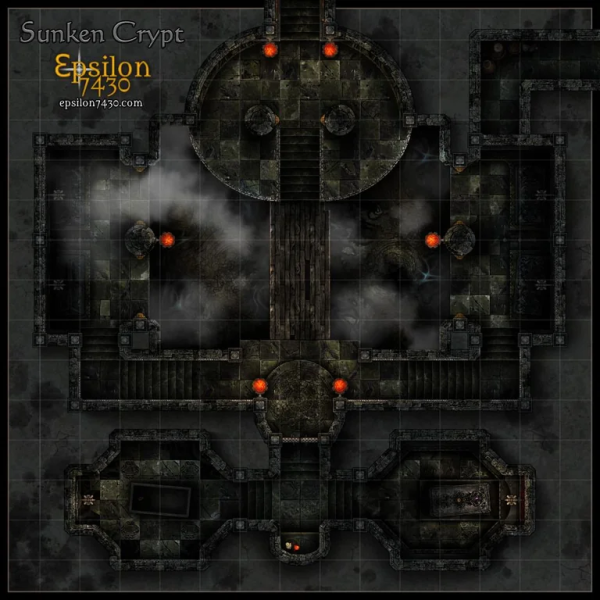

In [37]:
#downsample

h,w,_ = original_img.shape
scale_factor = 1/2
new_h = h * scale_factor
new_w = w * scale_factor

# smaller_image = cv2.resize(original_img, (0,0), fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)
smaller_image = cv2.resize(original_img, (600,600), interpolation=cv2.INTER_AREA)

show_rgb_image(smaller_image)



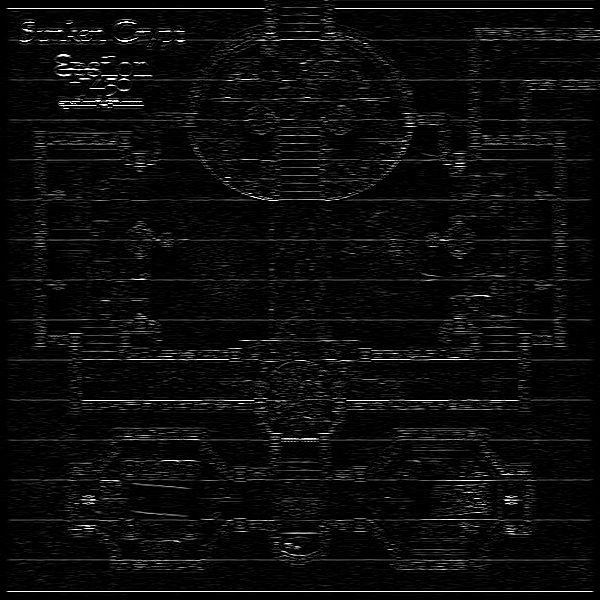

In [38]:
#blur
# blurred_image = cv2.GaussianBlur(smaller_image, 5, 9,9)
grey_image = cv2.cvtColor(smaller_image, cv2.COLOR_BGR2GRAY)
# sharpen_kernel= np.array([
#     [-1,  2, -1],
#     [-1,  2, -1],
#     [-1,  2, -1]
# ])

vert_line_kernel= np.array([
    [-1,  2, -1],
    [-1,  2, -1],
    [-1,  2, -1],
    [-1,  2, -1],
    [-1,  2, -1],
    [-1,  2, -1]
])

hoz_line_kernel = np.array([
    [-1, -1, -1, -1, -1],
    [ 2,  2,  2,  2,  2],
    [-1, -1, -1, -1, -1],
])


vert_emphasized_image = cv2.filter2D(grey_image, ddepth=-1, kernel=vert_line_kernel)
hoz_emphasized_image  = cv2.filter2D(grey_image, ddepth=-1, kernel=hoz_line_kernel)


show_rgb_image(hoz_emphasized_image)

In [15]:
# kernel = np.array([
#     [0, -1, 0],
#     [-1,  5, -1],
#     [0, -1, 0]
# ])

# dilatation_size = 1
# element_d = cv2.getStructuringElement(0, (2 * dilatation_size + 1, 2 * dilatation_size + 1),
#  (dilatation_size, dilatation_size))

# erode_size = 1
# element_e = cv2.getStructuringElement(0, (2 * erode_size + 1, 2 * erode_size + 1),
#  (erode_size, erode_size))

# er_image = blurred_image.copy()


# er_image = cv2.bilateralFilter(er_image, 7,20,150, borderType=cv2.BORDER_DEFAULT)
# er_image = cv2.dilate(er_image, element_d)
# # er_image = cv2.erode(er_image, element_e)
# # er_image = cv2.filter2D(er_image, ddepth=-1, kernel=kernel)


# # too_blurred = cv2.bilateralFilter(er_image, 7,20,150, borderType=cv2.BORDER_DEFAULT)

# # er_image =er_image -  too_blurred
# show_rgb_image(er_image)

NameError: name 'blurred_image' is not defined

In [39]:
high_threshold = 150
low_threshold = 60

vert_edges_image = cv2.Canny(vert_emphasized_image, low_threshold, high_threshold )
hoz_edges_image = cv2.Canny(hoz_emphasized_image, low_threshold, high_threshold )
# show_rgb_image(edges_image)

In [40]:
import math





def extract_lines(thresholded_image, rho, theta , threshold, minLineLength, maxLineGap):

    linesP = cv2.HoughLinesP(thresholded_image,
                                rho=rho,
                                theta=theta,
                                threshold=threshold,
                                lines=None,
                                minLineLength=minLineLength,
                                maxLineGap=maxLineGap)

    slopes = []
    good_lines = []

    if linesP is not None:
        for line in linesP:

            pt1 = (line[0][0], line[0][1])
            pt2 = (line[0][2], line[0][3])
            if (pt2[0]-pt1[0]) == 0:
                slopes.append(0)
            else:
                slopes.append((pt2[1]-pt1[1])/(pt2[0]-pt1[0]))

            if slopes[-1] < 0.005 and slopes[-1] > -0.005:
                good_lines.append((pt1, pt2))

    return good_lines


def find_grid():

    vert_good_lines = extract_lines(find_grid._vert_edges_image,
                                    find_grid._rho,
                                    find_grid._theta,
                                    find_grid._threshold,
                                    find_grid._minLineLength,
                                    find_grid._maxLineGap )

    hoz_good_lines  = extract_lines(find_grid._hoz_edges_image,
                                    find_grid._rho,
                                    find_grid._theta,
                                    find_grid._threshold,
                                    find_grid._minLineLength,
                                    find_grid._maxLineGap )

    good_lines = vert_good_lines + hoz_good_lines

    low_res_copy = smaller_image.copy()

    for (pt1, pt2) in good_lines:
        cv2.line(low_res_copy, pt1, pt2, (0,0,255), 1, cv2.LINE_AA)

    cv2.imshow("HoughExperiment", low_res_copy)

def set_rho(rho):
    find_grid._rho = rho/100.0
    find_grid()

def set_theta(theta):
    find_grid._theta = np.pi /theta
    find_grid()

def set_threshold(threshold):
    find_grid._threshold = threshold
    find_grid()

def set_minLineLength(minLineLength):
    find_grid._minLineLength =minLineLength
    find_grid()

def set_maxLineGap(maxLineGap):
    find_grid._maxLineGap = maxLineGap
    find_grid()

find_grid._rho = 1
find_grid._theta = 1*np.pi / 180.0
find_grid._threshold = 200
find_grid._minLineLength =100
find_grid._maxLineGap = 300

find_grid._vert_edges_image = vert_edges_image
find_grid._hoz_edges_image = hoz_edges_image
cv2.namedWindow('HoughExperiment')
cv2.createTrackbar('rho', 'HoughExperiment', 100, 200, set_rho)
cv2.createTrackbar('theta', 'HoughExperiment', 180, 360, set_theta)
cv2.createTrackbar('threshold', 'HoughExperiment',200 , 1000, set_threshold)
cv2.createTrackbar('minLineLength', 'HoughExperiment', 100, 1000, set_minLineLength)
cv2.createTrackbar('maxLineGap', 'HoughExperiment', 300, 1000, set_maxLineGap)
# Do whatever you want with contours
# Wait until user press some key
cv2.waitKey()
cv2.destroyWindow("HoughExperiment")

#show_rgb_image(low_res_copy)
